## RCA Ecommerce Data

In [119]:
## importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import ggplot, aes, geom_line, geom_smooth, scale_y_continuous, geom_hline, theme_linedraw, labs

import os
import sys
import warnings 
warnings.filterwarnings('ignore')

import kagglehub


### 1. Data Preprocessing 

In [2]:
# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-cosmetics-shop")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\saiba\.cache\kagglehub\datasets\mkechinov\ecommerce-events-history-in-cosmetics-shop\versions\6


In [3]:
## reading the data
path = path
print(os.listdir(path))
oct_2019_df = pd.read_csv(path + r"\2019-Oct.csv")
nov_2019_df = pd.read_csv(path + r"\2019-Nov.csv")
dec_2019_df = pd.read_csv(path + r"\2019-Dec.csv")
jan_2020_df = pd.read_csv(path + r"\2020-Jan.csv")
feb_2020_df = pd.read_csv(path + r"\2020-Feb.csv")

['2019-Dec.csv', '2019-Nov.csv', '2019-Oct.csv', '2020-Feb.csv', '2020-Jan.csv']


In [4]:
## checking the dataset
print(f"Oct 2019 dataset has {oct_2019_df.shape[0]} rows and {oct_2019_df.shape[1]} columns")
print(f"Nov 2019 dataset has {nov_2019_df.shape[0]} rows and {nov_2019_df.shape[1]} columns")
print(f"Dec 2019 dataset has {dec_2019_df.shape[0]} rows and {dec_2019_df.shape[1]} columns")
print(f"Jan 2020 dataset has {jan_2020_df.shape[0]} rows and {jan_2020_df.shape[1]} columns")
print(f"Feb 2020 dataset has {feb_2020_df.shape[0]} rows and {feb_2020_df.shape[1]} columns")

Oct 2019 dataset has 4102283 rows and 9 columns
Nov 2019 dataset has 4635837 rows and 9 columns
Dec 2019 dataset has 3533286 rows and 9 columns
Jan 2020 dataset has 4264752 rows and 9 columns
Feb 2020 dataset has 4156682 rows and 9 columns


In [5]:
## checking the data
oct_2019_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [6]:
## checking the data
oct_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [7]:
## changing the dtypes
def change_to_datetime(df, col):
    df[col] = pd.to_datetime(df[col])
    return df   

In [8]:
## changing the dtypes
oct_2019_df = change_to_datetime(oct_2019_df, 'event_time')

In [9]:
## difference event_type
oct_2019_df['event_type'].value_counts()

event_type
view                1862164
cart                1232385
remove_from_cart     762110
purchase             245624
Name: count, dtype: int64

In [10]:
## exploring Nov Data
nov_2019_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [11]:
## exploring data
nov_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.3+ MB


In [12]:
## changing the dtypes
nov_2019_df = change_to_datetime(nov_2019_df, 'event_time')

In [13]:
## different event_type
nov_2019_df['event_type'].value_counts()

event_type
view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: count, dtype: int64

In [14]:
## dec data
dec_2019_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [15]:
## exploring data
dec_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [16]:
## changing the dtypes
dec_2019_df = change_to_datetime(dec_2019_df, 'event_time')


In [17]:
## different event_type
dec_2019_df['event_type'].value_counts()

event_type
view                1728331
cart                 927124
remove_from_cart     664655
purchase             213176
Name: count, dtype: int64

In [18]:
## Jan data
jan_2020_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [19]:
## exploring data
jan_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


In [20]:
## changing the dtypes
jan_2020_df = change_to_datetime(jan_2020_df, 'event_time')

In [21]:
## different event_type
jan_2020_df['event_type'].value_counts()

event_type
view                2037608
cart                1148323
remove_from_cart     815024
purchase             263797
Name: count, dtype: int64

In [22]:
## Feb data
feb_2020_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:01 UTC,cart,5844305,1487580006317032337,NaN,NaN,2.14,485174092,4be9643a-420b-4c6b-83dd-a15e772fbf7a
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d
2,2020-02-01 00:00:08 UTC,view,5817765,1487580008246412266,NaN,zeitun,11.03,495404942,3a569c8d-d848-4f09-a925-33f673d84c46
3,2020-02-01 00:00:11 UTC,view,5877033,1487580010100293687,NaN,milv,3.49,564814969,7feb39e5-bb7b-4b2b-a546-3e3b7c56326e
4,2020-02-01 00:00:12 UTC,cart,5814871,1487580008112194531,NaN,zinger,2.54,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb


In [23]:
## exploring data
feb_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156682 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 285.4+ MB


In [24]:
## changing the dtypes
feb_2020_df = change_to_datetime(feb_2020_df, 'event_time')

In [25]:
## different event_type
feb_2020_df['event_type'].value_counts()

event_type
view                1953586
cart                1148694
remove_from_cart     812409
purchase             241993
Name: count, dtype: int64

#### 1.1 Merging all Dataset

In [26]:
## merging all dfs
mom_df = pd.concat([oct_2019_df, nov_2019_df, dec_2019_df, jan_2020_df, feb_2020_df], axis=0)
print(f"Combined dataset has {mom_df.shape[0]} rows and {mom_df.shape[1]} columns")

Combined dataset has 20692840 rows and 9 columns


In [27]:
## check data
mom_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [28]:
## check data
mom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20692840 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 1.5+ GB


In [29]:
## checking the missing values
mom_df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [30]:
## drop all the rows where user_session is missing
print(mom_df.shape)
mom_df.dropna(subset=['user_session'], inplace=True)
print(mom_df.shape)

(20692840, 9)
(20688242, 9)


In [31]:
## checking any anomalies in the data
mom_df.describe()

,product_id,category_id,price,user_id
count,2.068824e+07,2.068824e+07,2.068824e+07,2.068824e+07
mean,5.484278e+06,1.554231e+18,8.534892e+00,5.215434e+08
std,1.305751e+06,1.691034e+17,1.938206e+01,8.744436e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.817834e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531190e+08
75%,5.857864e+06,1.487580e+18,7.030000e+00,5.788491e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [32]:
## assuming the price negative values may be due to human error, so we will remove them
print(mom_df.shape)
mom_df = mom_df[mom_df['price'] >= 0]
print(mom_df.shape)

(20688242, 9)
(20688111, 9)


In [33]:
## Category Code is of No Use for Now, so will remove the column
mom_df.drop(
    'category_code', axis = 1, inplace = True
)

In [34]:
## with event time, we need event date, event hour and is_weekend flag as well
mom_df['event_date'] = mom_df['event_time'].dt.date
mom_df['event_hour'] = mom_df['event_time'].dt.hour
mom_df['is_weekend'] = np.where(mom_df['event_time'].dt.dayofweek.isin([5, 6]), 1, 0)

In [35]:
## checking the data
mom_df.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_date,event_hour,is_weekend
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0,0
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0,0
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,0,0
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0,0
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,0,0


In [36]:
## changing the orders
cols = ['event_time', 'event_date', 'event_hour', 'user_id', 'user_session', 'product_id', 'category_id', 'brand', 'price', 'event_type', 'is_weekend']
mom_df = mom_df[cols]

## checking the data
mom_df.head()

,event_time,event_date,event_hour,user_id,user_session,product_id,category_id,brand,price,event_type,is_weekend
0,2019-10-01 00:00:00+00:00,2019-10-01,0,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5773203,1487580005134238553,runail,2.62,cart,0
1,2019-10-01 00:00:03+00:00,2019-10-01,0,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5773353,1487580005134238553,runail,2.62,cart,0
2,2019-10-01 00:00:07+00:00,2019-10-01,0,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,5881589,2151191071051219817,lovely,13.48,cart,0
3,2019-10-01 00:00:07+00:00,2019-10-01,0,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,5723490,1487580005134238553,runail,2.62,cart,0
4,2019-10-01 00:00:15+00:00,2019-10-01,0,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,5881449,1487580013522845895,lovely,0.56,cart,0


In [37]:
## checking the data
mom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20688111 entries, 0 to 4156681
Data columns (total 11 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_date    object             
 2   event_hour    int32              
 3   user_id       int64              
 4   user_session  object             
 5   product_id    int64              
 6   category_id   int64              
 7   brand         object             
 8   price         float64            
 9   event_type    object             
 10  is_weekend    int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), int64(3), object(4)
memory usage: 1.7+ GB


In [38]:
## changing the dtypes
mom_df = change_to_datetime(mom_df, 'event_date')

For the month

1. Unique Users
2. Unique Sessions
3. Max Sessions by Users
4. Purchase count and Purchase Amount by User, and variation with session count, userwise total session count and total purchase
5. Number of Sessions where View -> Cart -> Purchase [Full Cycle Completed]
6. Avg Sessions Time
7. DAU [Daily Active Users], MAU[Monthly Active Users], WAU[Weekly Active Users]
8. Rate of Conv, from Cart -> Purchase / Cart -> Remove From Cart [Any Brand Specific Trends]
9. Cart -> Remove From Cart -> Purchase [Same Brand or Different Brand, Any Trends]
10. Avg Time between Cart -> Purchase / Cart -> Remove From Cart [Brand Specific Trends]

### 2. EDA [Metrics]

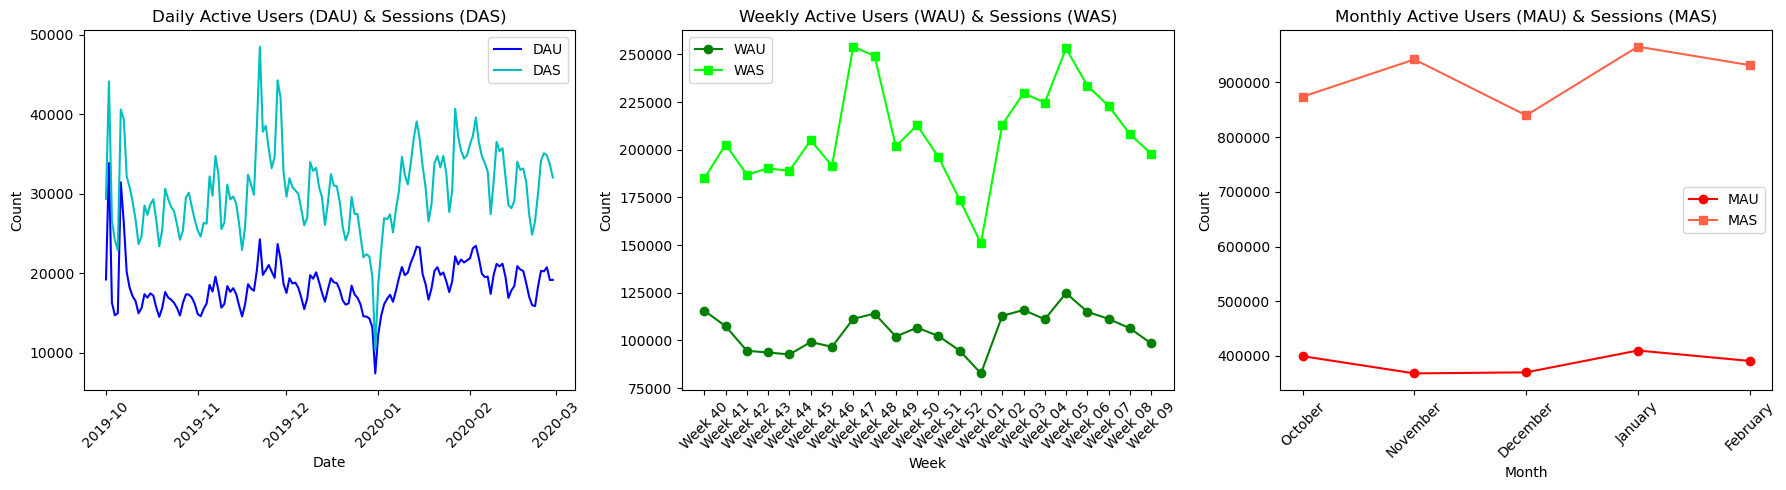

In [39]:
## DAU [Daily Active Users]
dau = mom_df.groupby('event_date')['user_id'].nunique().reset_index()
dau.columns = ['event_date', 'DAU']

## DAS [Daily Active Sessions]
das = mom_df.groupby('event_date')['user_session'].nunique().reset_index()
das.columns = ['event_date', 'DAS']

## WAU [Weekly Active Users] - Convert to week number
wau = mom_df.groupby(mom_df['event_date'].dt.to_period('W'))['user_id'].nunique().reset_index()
wau.columns = ['week', 'WAU']
wau['week'] = wau['week'].dt.strftime('Week %U')  # Convert to week number

## WAS [Weekly Active Sessions] - Convert to week number
was_ = mom_df.groupby(mom_df['event_date'].dt.to_period('W'))['user_session'].nunique().reset_index()
was_.columns = ['week', 'WAS']
was_['week'] = was_['week'].dt.strftime('Week %U')  # Convert to week number

## MAU [Monthly Active Users] - Convert to month name
mau = mom_df.groupby(mom_df['event_date'].dt.to_period('M'))['user_id'].nunique().reset_index()
mau.columns = ['month', 'MAU']
mau['month'] = mau['month'].dt.strftime('%B')  # Convert to month name

## MAS [Monthly Active Sessions] - Convert to month name
mas = mom_df.groupby(mom_df['event_date'].dt.to_period('M'))['user_session'].nunique().reset_index()
mas.columns = ['month', 'MAS']
mas['month'] = mas['month'].dt.strftime('%B')  # Convert to month name

## Creating Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot DAU & DAS together
axes[0].plot(dau['event_date'], dau['DAU'], color='b', label='DAU')
axes[0].plot(das['event_date'], das['DAS'], color='c', label='DAS')
axes[0].set_title('Daily Active Users (DAU) & Sessions (DAS)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plot WAU & WAS together
axes[1].plot(wau['week'], wau['WAU'], marker='o', color='g', label='WAU')
axes[1].plot(was_['week'], was_['WAS'], marker='s', color='lime', label='WAS')
axes[1].set_title('Weekly Active Users (WAU) & Sessions (WAS)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# Plot MAU & MAS together
axes[2].plot(mau['month'], mau['MAU'], marker='o', color='r', label='MAU')
axes[2].plot(mas['month'], mas['MAS'], marker='s', color='tomato', label='MAS')
axes[2].set_title('Monthly Active Users (MAU) & Sessions (MAS)')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### 3. Business Insights and Recomendations

#### 3.1 Investigating December Fall


* From the following figures, the difference in removing products from cart, compared to making a purchase is apparent. This is in line with our previous recommendation to optimize cart abandonment rate. In total sales, there seems to be a general trend ranging from 25,000 to 50,000 in local currency. However, there seems to be a steep increase during the month of november, could be due to “Black Friday” which is an informal title for the Friday following Thanksgiving day in the US. Many leading stores offer highly promotional sales on this day or during this period. This suggests that the firm was able to capture this sector of crowd pretty well.

* There is another steep increase close to February, 2020 which could be due to approaching “Valentines day”. Surprisingly there is a big dip in sales leading up to 31 Dec, 2019, even though days leading up to Christmas and New Year are considered crucial in seasonal factors. These reasons could indicate poor marketing reach tailored for these holiday events due to which customers are more driven towards other firms offering such convenient, “eye candy” offers. This reasoning seems to be intact from the steeper dip added to cart funnel from the plot above while viewers did not seem to have the same dip.

* However it seems a bit wary that the firm was able to capture promotional events and holidays pretty well except for Christmas and New Year, suggesting the need for investigation on the matter. An interesting relevant announcement was made on December 5, 2019 by China banning the production of cosmetics which contain “microbeads” owing to the presence of harmful ingredients.

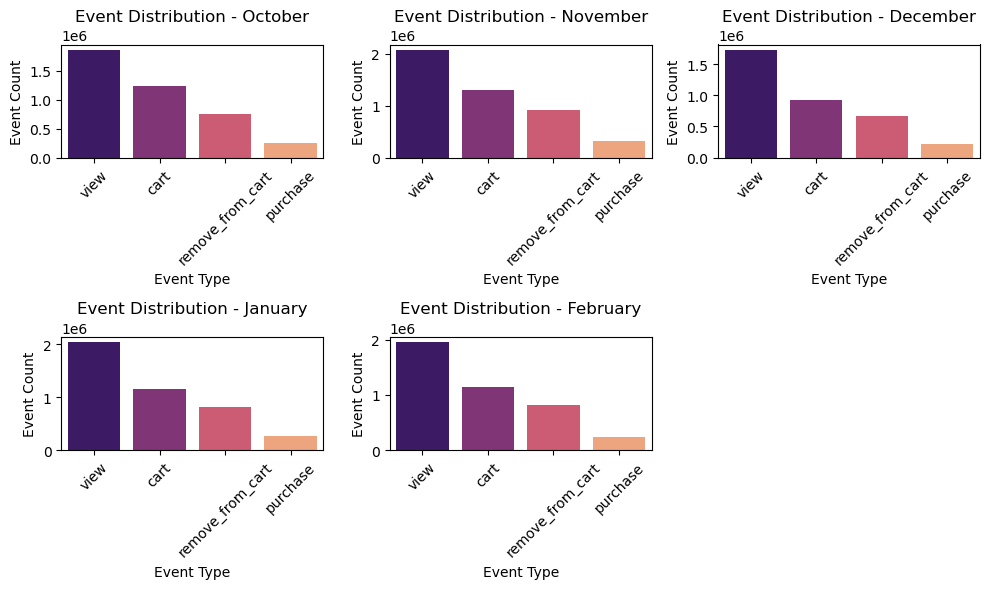

In [66]:
## Distribution of Different event type on MoM change
mom_event_cnts = mom_df.groupby([mom_df['event_date'].dt.to_period('M')])['event_type'].value_counts().reset_index()
mom_event_cnts.columns = ['month', 'event_type', 'event_count']
mom_event_cnts['month'] = mom_event_cnts['month'].dt.strftime('%B')

## plotting the results

# Get unique months
months = mom_event_cnts['month'].unique()

# Create subplots
total_months = len(months)
rows = (total_months // 3) + (total_months % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(10, rows * 3))
axes = axes.flatten()

# Plot each month's event distribution in a separate subplot
for i, month in enumerate(months):
    month_data = mom_event_cnts[mom_event_cnts['month'] == month]
    sns.barplot(ax=axes[i], x='event_type', y='event_count', data=month_data, palette='magma')
    axes[i].set_title(f'Event Distribution - {month}', fontsize=12)
    axes[i].set_ylabel('Event Count')
    axes[i].set_xlabel('Event Type')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


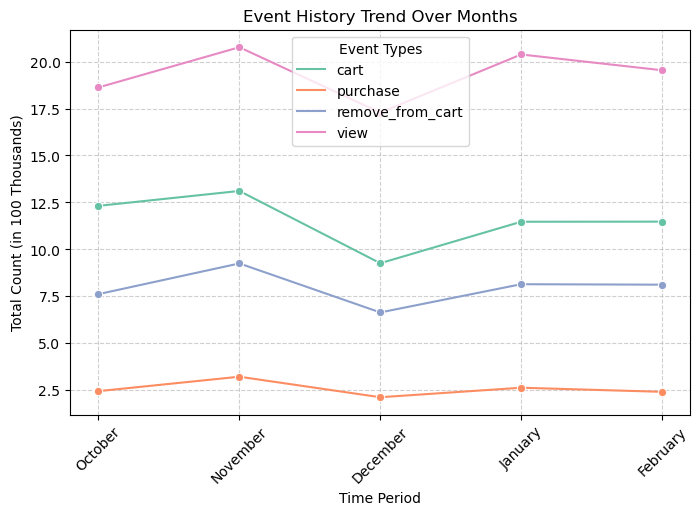

In [67]:
## Event Trend Line 

# Trend line for event history
month_order = ["October", "November", "December", "January", "February"]

event_trend = mom_event_cnts.groupby(['month', 'event_type'])['event_count'].sum().reset_index()
event_trend['month'] = pd.Categorical(event_trend['month'], categories=month_order, ordered=True)
event_trend['event_count'] = event_trend['event_count'] / 100000  # Scale count

plt.figure(figsize=(8, 5))
sns.lineplot(data=event_trend, x='month', y='event_count', hue='event_type', marker='o', linewidth=1.5, palette='Set2')
plt.title("Event History Trend Over Months")
plt.xlabel("Time Period")
plt.ylabel("Total Count (in 100 Thousands)")
plt.xticks(rotation=45)
plt.legend(title="Event Types")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

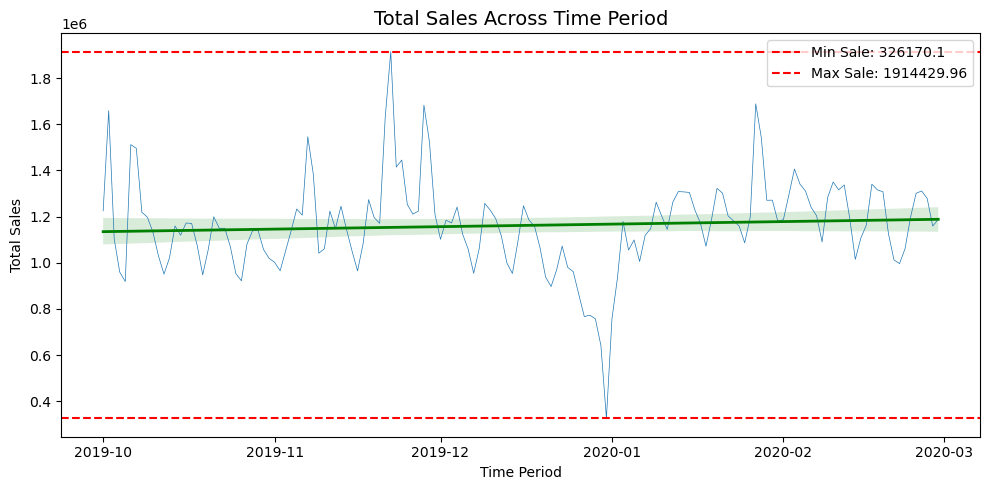

In [113]:
## Change in Sales MoM
mom_sales = mom_df.groupby(mom_df['event_date'].dt.to_period('D'))['price'].sum().reset_index()
mom_sales['event_date'] = mom_sales['event_date'].dt.to_timestamp()  # Convert to timestamp

## max and min sales
max_mom_sales, min_mom_sales = mom_sales[mom_sales['price'] == mom_sales['price'].max()][['event_date', 'price']] , \
                               mom_sales[mom_sales['price'] == mom_sales['price'].min()][['event_date', 'price']]

# Convert event_date to numeric format for lmplot
mom_sales['event_date_num'] = mdates.date2num(mom_sales['event_date'])

# Plot the line plot with total sales over time
plt.figure(figsize=(10, 5))

sns.lineplot(x='event_date', y='price', data=mom_sales, linewidth=0.5)
sns.regplot(data=mom_sales, x='event_date_num', y='price', color='g', scatter=False, line_kws={'lw': 2})

# Adding horizontal dashed lines for max and min sales
plt.axhline(y=mom_sales['price'].min(), color='red', linestyle='--', label=f"Min Sale: {mom_sales['price'].min()}")
plt.axhline(y=mom_sales['price'].max(), color='red', linestyle='--', label=f"Max Sale: {mom_sales['price'].max()}")

# Customize the plot with labels and title
plt.xlabel('Time Period')
plt.ylabel('Total Sales')
plt.title('Total Sales Across Time Period', fontsize=14)
plt.legend()

plt.tight_layout()

plt.show()

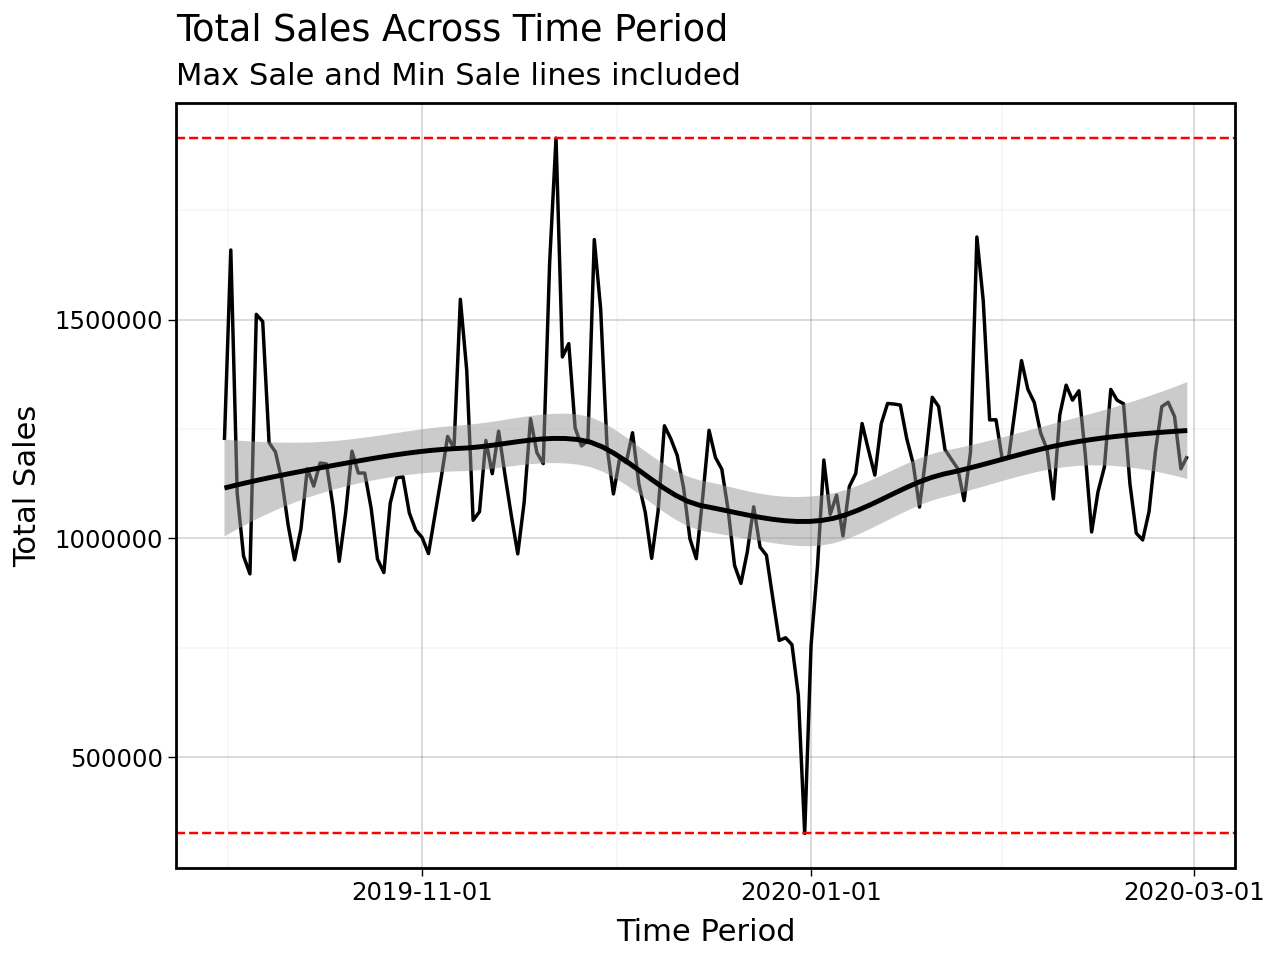

<Figure size 1000x500 with 0 Axes>

In [128]:
# ggplot in Python using plotnine
plt.figure(figsize=(10, 5))
gg = (ggplot(mom_sales, aes(x='event_date', y='price'))
      + geom_line(size=0.7)
      + geom_smooth(method='loess', se=True, alpha=0.5)
      + geom_hline(yintercept=mom_sales['price'].min(), linetype="dashed", color="red")
      + geom_hline(yintercept=mom_sales['price'].max(), linetype="dashed", color="red")
      + labs(title="Total Sales Across Time Period",
             subtitle="Max Sale and Min Sale lines included",
             x="Time Period", y="Total Sales")
      + theme_linedraw())


gg


**Recommendation** 
 * 1: Offer tailor made marketing campaigns and offers via online (e-mails, mobile notifications etc) and offline (kiosks at public areas etc) means specifically during observed holidays.

#### 3.2. Impact of conversion and cart abandonment rate